# SNF example using R

In this example script we will go through the different steps to carry out the similarity network fusion analysis. This will also work to compare with the python implementation. Steps

1. Remove non-significant SNPs (Bonferroni corrected pval)
1. Calculate the distance matrix for metabolites (Euclidean distance) and SNPs (Chi2 distance)
2. Generate the affinity matrix out of the distance matrices
3. Apply the SNF iterative process

In [1]:
#### LIBRARIES
library(igraph)
library(SNFtool)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
#### SET PATHS
setwd('../')
mainpath <- getwd()
datapath <- paste0(mainpath, '/Data')

In [3]:
#### LOAD DATA
setwd(datapath)
dat <- read.csv('MFA_data.txt', sep = '\t')
dat

,snp1,snp2,snp3,snp4,snp5,snp6,status,Met1,Met2,Met3,Met4,Met5,Met6,Met7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AG,GG,GG,GG,AG,GG,control,19.11573,24.79924,27.515510,18.720287,17.537699,7.985089,17.269974
2,GG,GG,AA,AG,AA,AA,control,17.88117,33.28019,23.602213,18.634412,26.336851,14.980349,26.566395
3,AG,AG,GG,AA,AA,GG,control,14.63651,21.46903,8.892394,34.586894,25.074224,25.075590,17.695359
4,AG,AA,AA,AA,AG,AA,control,20.85908,18.65394,13.926668,13.942551,14.533406,21.602728,18.705230
5,AA,GG,AA,AG,GG,GG,control,21.47882,22.53377,13.945255,26.942080,11.095887,22.379987,14.133174
6,AA,AA,AA,GG,AA,AA,control,12.28264,21.71357,26.547907,24.699619,16.448431,11.375599,20.703002
7,AG,AA,GG,AA,GG,AA,control,17.91016,23.17385,34.634938,25.256526,13.755048,22.490327,15.557572
8,GG,GG,AA,GG,AA,AA,control,17.45185,11.53973,21.731587,16.571383,14.528870,25.834259,16.728825
9,AA,GG,AA,AG,AG,AA,control,20.85102,16.87717,27.125978,13.639804,19.603526,24.340940,18.654625


In [95]:
#### SPLIT DATA 
snp <- dat[,1:6]
met <- dat[,8:14]
status <- dat[,7]
met_norm <- standardNormalization(met) #normalize continuous

In [96]:
#### RECODE STATUS DATA
status[status=='control'] <- 0.0
status[status=='case']    <- 1.0
status <- as.numeric(status)

In [97]:
#### RECODE SNP DATA
snp_rec <- snp
snp_rec[snp_rec == 'AA'] <- 0.0
snp_rec[snp_rec == 'AG'] <- 1.0
snp_rec[snp_rec == 'GG'] <- 2.0
snp_rec <- mapply(snp_rec, FUN=as.numeric)

In [98]:
#### LOGISTIC REGRESSION
nsnps    <- dim(snp_rec)[2]
snp_bool <- rep(TRUE, nsnps)
for(i in 1:nsnps){
    model <- glm(status ~ snp_rec[,i], family=binomial(link='logit'))
    pval  <- coef(summary(model))[,4][2]
    if(pval>(0.05/6) ){
        snp_bool[i] <- FALSE
    }
}

#### RETAIN SIGNIFICANT SNPs
snp_rec_sig <- snp_rec[,snp_bool]

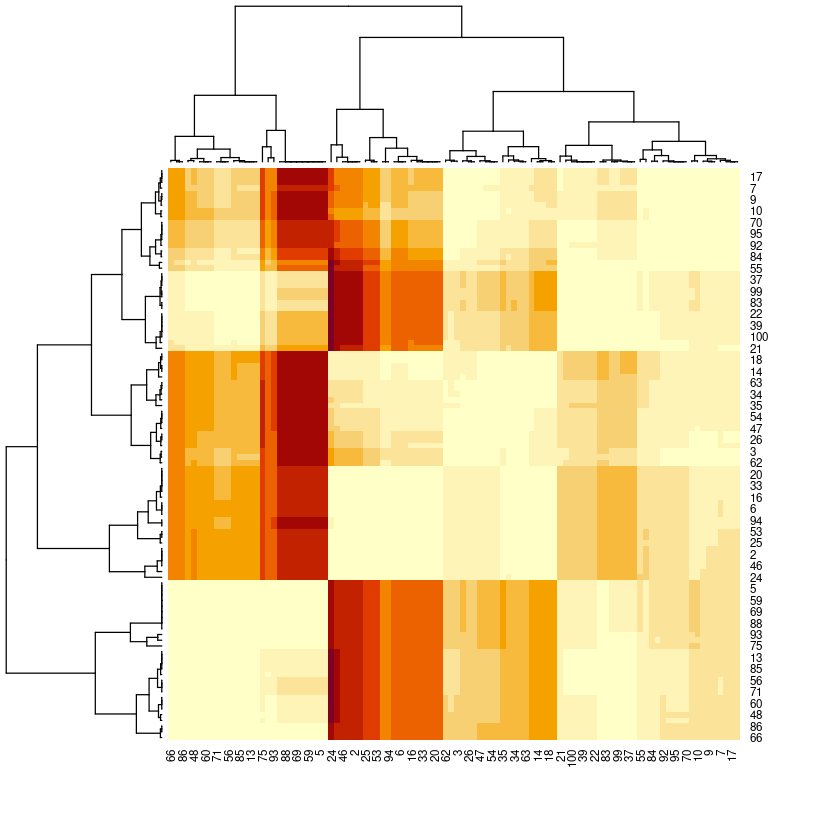

In [109]:
#### REDUCE DIMENSION ON SNP MATRIX
snp_pca      <- prcomp(snp_rec_sig)
snp_pca_dist <- dist2(as.matrix(snp_pca$x[,1]), as.matrix(snp_pca$x[,1]))
heatmap(snp_pca_dist)

In [118]:
#### CALCULATE DISTANCES
met_dist <- dist2(as.matrix(met_norm), as.matrix(met_norm))
# Avoid divide by zero
snp_rec_sig <- snp_rec_sig + 1
snp_dist <- chiDist2(snp_rec_sig)
dimn <- dimnames(met_dist)
dimnames(snp_dist) <- dimn
dimnames(snp_pca_dist) <- dimn

In [102]:
met_dist

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
1,0.000000,4.476812,1.436262e+01,5.833971e+00,8.0998862,1.349183,6.9449849,9.0551656,7.9488359,13.908708,⋯,9.491029,21.22358,9.322308,25.48979,21.39622,30.30825,12.504606,24.73663,21.639535,23.54816
2,4.476812,0.000000,9.565387e+00,5.700164e+00,10.4148197,3.787377,7.8664544,8.0733418,5.0877545,4.860394,⋯,5.684236,14.72587,9.380420,18.78784,19.44093,25.89682,13.586454,14.55241,18.383555,16.68329
3,14.362622,9.565387,3.552714e-15,1.123912e+01,5.5723580,8.878664,4.9162705,8.9483127,9.7280633,9.815648,⋯,15.417668,18.60322,16.187749,31.98041,19.91137,24.31027,13.703551,13.20948,14.414193,24.30314
4,5.833971,5.700164,1.123912e+01,1.776357e-15,4.0511555,5.523240,3.0378932,0.7740592,0.8049211,4.674611,⋯,5.647493,17.72547,9.489043,37.88077,16.36093,40.49155,13.712876,24.00803,14.046512,26.80762
5,8.099886,10.414820,5.572358e+00,4.051155e+00,0.0000000,4.949936,0.4689119,2.9772666,5.5908226,10.491414,⋯,10.497197,20.18163,11.627922,40.81845,16.75648,35.59793,11.395952,21.55180,10.889222,29.67987
6,1.349183,3.787377,8.878664e+00,5.523240e+00,4.9499357,0.000000,4.0670329,7.4844204,7.4387026,11.373524,⋯,8.536180,20.65061,10.602239,27.08300,21.65219,29.97330,12.680138,20.47004,17.657456,23.50171
7,6.944985,7.866454,4.916270e+00,3.037893e+00,0.4689119,4.067033,0.0000000,2.0255471,3.7357280,7.746402,⋯,7.709360,16.14458,9.080348,36.92249,13.80331,32.65713,9.787094,18.20927,8.904216,23.82514
8,9.055166,8.073342,8.948313e+00,7.740592e-01,2.9772666,7.484420,2.0255471,0.0000000,0.8612223,4.501807,⋯,7.130851,17.27523,10.789631,42.65519,15.11526,41.29870,13.821177,23.42580,11.876085,27.32944
9,7.948836,5.087754,9.728063e+00,8.049211e-01,5.5908226,7.438703,3.7357280,0.8612223,0.0000000,2.518224,⋯,5.285674,13.84371,8.648380,35.23618,13.56136,36.49287,12.654143,20.42098,12.949898,22.10818
10,13.908708,4.860394,9.815648e+00,4.674611e+00,10.4914143,11.373524,7.7464023,4.5018071,2.5182236,0.000000,⋯,5.387645,13.60549,12.284049,32.74090,16.91460,37.08815,17.491316,15.36514,13.132024,20.52672


In [103]:
snp_dist

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
1,0.00000000,0.31128835,0.06543634,0.28792538,0.08645388,0.04048951,0.42553728,0.31128835,0.20224905,0.32003895,⋯,0.29067605,0.249355430,0.02786464,0.07550415,0.09626117,0.08645388,0.09626117,0.16526754,0.00000000,0.32103852
2,0.31128835,0.00000000,0.38285893,0.33596454,0.62212184,0.25305941,0.58683881,0.00000000,0.36745042,0.25990755,⋯,0.54033672,0.168499889,0.38729730,0.19208550,0.65944703,0.62212184,0.65944703,0.65831195,0.31128835,0.64456112
3,0.06543634,0.38285893,0.00000000,0.40351724,0.25789633,0.12473417,0.62580414,0.38285893,0.48573048,0.48889016,⋯,0.62726191,0.448275254,0.15174466,0.23680733,0.07172597,0.25789633,0.07172597,0.38201984,0.06543634,0.63863132
4,0.28792538,0.33596454,0.40351724,0.00000000,0.39636571,0.11247085,0.05048602,0.33596454,0.42152692,0.02330375,⋯,0.37031837,0.089535067,0.20799621,0.34757185,0.64230664,0.39636571,0.64230664,0.26473195,0.28792538,0.25885643
5,0.08645388,0.62212184,0.25789633,0.39636571,0.00000000,0.13518830,0.41439822,0.62212184,0.16755308,0.42847927,⋯,0.16924016,0.352299145,0.04022131,0.16195802,0.17329228,0.00000000,0.17329228,0.04383164,0.08645388,0.17461547
6,0.04048951,0.25305941,0.12473417,0.11247085,0.13518830,0.00000000,0.21741055,0.25305941,0.21699574,0.14128074,⋯,0.25305941,0.121940283,0.02793147,0.11004703,0.23354571,0.13518830,0.23354571,0.13508418,0.04048951,0.23023773
7,0.42553728,0.58683881,0.62580414,0.05048602,0.41439822,0.21741055,0.00000000,0.58683881,0.46034473,0.07221659,⋯,0.32224418,0.158970830,0.27343264,0.48235203,0.81928086,0.41439822,0.81928086,0.22019741,0.42553728,0.16760849
8,0.31128835,0.00000000,0.38285893,0.33596454,0.62212184,0.25305941,0.58683881,0.00000000,0.36745042,0.25990755,⋯,0.54033672,0.168499889,0.38729730,0.19208550,0.65944703,0.62212184,0.65944703,0.65831195,0.31128835,0.64456112
9,0.20224905,0.36745042,0.48573048,0.42152692,0.16755308,0.21699574,0.46034473,0.36745042,0.00000000,0.33284872,⋯,0.04396351,0.182693668,0.16100404,0.06032802,0.48323427,0.16755308,0.48323427,0.19033646,0.20224905,0.15078212
10,0.32003895,0.25990755,0.48889016,0.02330375,0.42847927,0.14128074,0.07221659,0.25990755,0.33284872,0.00000000,⋯,0.29426139,0.031147772,0.23830777,0.29579192,0.73811977,0.42847927,0.73811977,0.29354183,0.32003895,0.22538262


In [104]:
snp_pca_dist

0.00000000,4.62907117,0.89429562,2.095808295,1.1714984,3.527470612,0.477866711,4.62907117,0.5523814980,0.6855256629,⋯,0.0001739211,0.407943264,0.5721586,2.85236891,0.384060197,1.1714984,0.384060197,0.12853117,0.00000000,0.03100152
4.62907117,0.00000000,1.45408771,0.495386467,10.4580149,0.074731957,2.132325965,0.00000000,1.9833199221,1.7518186583,⋯,4.6859934280,2.288634257,8.4561108,0.21402825,2.346416545,10.4580149,2.346416545,6.30030118,4.62907117,3.90242303
0.89429562,1.45408771,0.00000000,0.252022706,4.1129050,0.869526650,0.064715801,1.45408771,0.0409853243,0.0138550022,⋯,0.9194124264,0.094229158,2.8970889,0.55238150,0.106240886,4.1129050,0.106240886,1.70089717,0.89429562,0.59228347
2.09580830,0.49538647,0.25202271,0.000000000,6.4011452,0.185300544,0.572158564,0.49538647,0.4962736929,0.3840601974,⋯,2.1341662646,0.654458855,4.8580670,0.05817989,0.685525663,6.4011452,0.685525663,3.26236969,2.09580830,1.61701281
1.17149836,10.45801487,4.11290496,6.401145177,0.0000000,8.764642849,3.145787557,10.45801487,3.3327478015,3.6493322388,⋯,1.1431241896,2.962054890,0.1062409,7.67984619,2.897088860,0.0000000,2.897088860,0.52395207,1.17149836,1.58364674
3.52747061,0.07473196,0.86952665,0.185300544,8.7646428,0.000000000,1.408677330,0.07473196,1.2880716737,1.1029019805,⋯,3.5771824673,1.536240790,6.9409475,0.03581950,1.583646740,8.7646428,1.583646740,5.00268648,3.52747061,2.89708886
0.47786671,2.13232597,0.06471580,0.572158564,3.1457876,1.408677330,0.000000000,2.13232597,0.0026982498,0.0186829893,⋯,0.4962736929,0.002764097,2.0958083,0.99523913,0.005119851,3.1457876,0.005119851,1.10206215,0.47786671,0.26543779
4.62907117,0.00000000,1.45408771,0.495386467,10.4580149,0.074731957,2.132325965,0.00000000,1.9833199221,1.7518186583,⋯,4.6859934280,2.288634257,8.4561108,0.21402825,2.346416545,10.4580149,2.346416545,6.30030118,4.62907117,3.90242303
0.55238150,1.98331992,0.04098532,0.496273693,3.3327478,1.288071674,0.002698250,1.98331992,0.0000000000,0.0071810458,⋯,0.5721585643,0.010924296,2.2489062,0.89429562,0.015251710,3.3327478,0.015251710,1.21382256,0.55238150,0.32166052
0.68552566,1.75181866,0.01385500,0.384060197,3.6493322,1.102901980,0.018682989,1.75181866,0.0071810458,0.0000000000,⋯,0.7075378451,0.035819502,2.5102486,0.74120218,0.043363426,3.6493322,0.043363426,1.40772817,0.68552566,0.42496354
1.14312419,1.17149836,0.01525171,0.143278009,4.6290712,0.654458855,0.142801472,1.17149836,0.1062408862,0.0581798947,⋯,1.1714983570,0.185300544,3.3327478,0.38406020,0.201999869,4.6290712,0.201999869,2.03827675,1.14312419,0.79762291


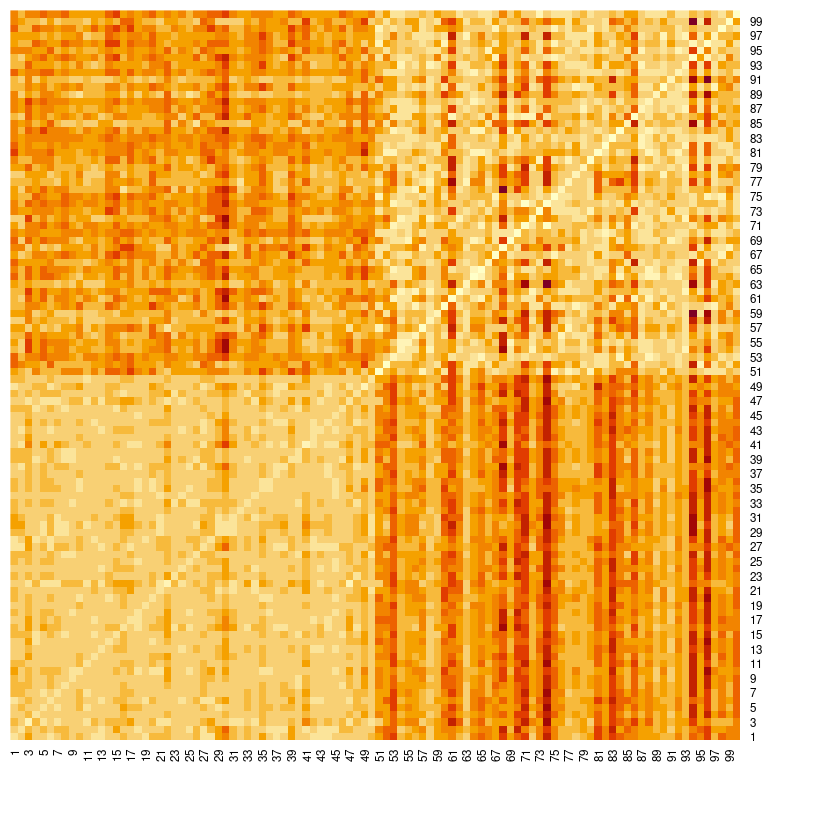

In [110]:
heatmap(met_dist, Rowv = NA, Colv = NA)

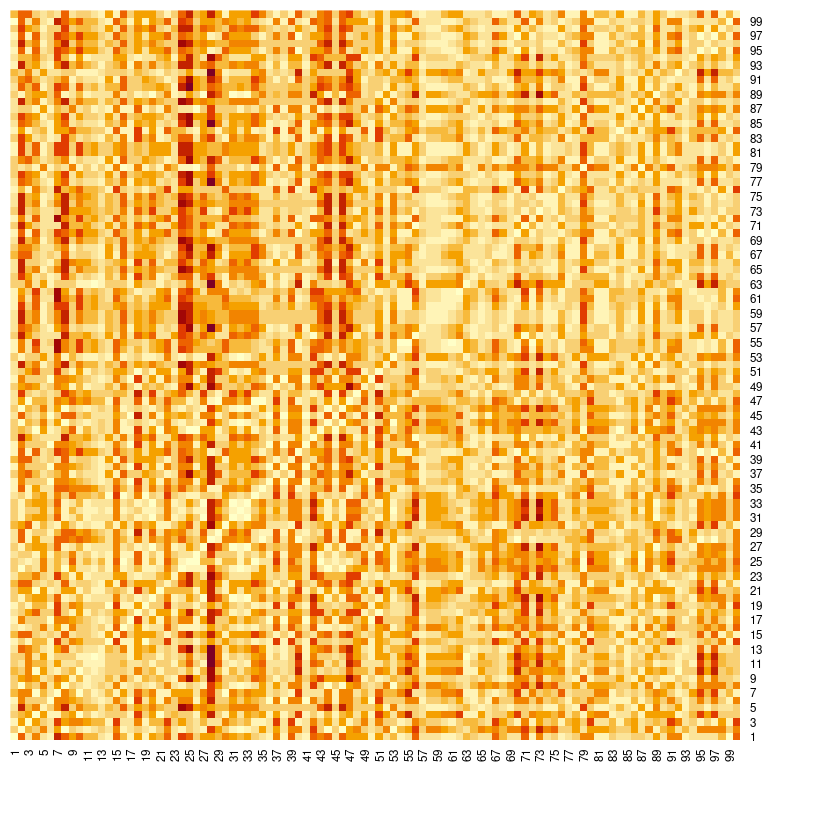

In [111]:
heatmap(snp_dist, Rowv = NA, Colv = NA)

In [119]:
#### ESTIMATE SIMILARITY GRAPHS
K     <- 20
alpha <- 0.5
W1 <- affinityMatrix(met_dist, K, alpha)
W2 <- affinityMatrix(snp_pca_dist, K, alpha)

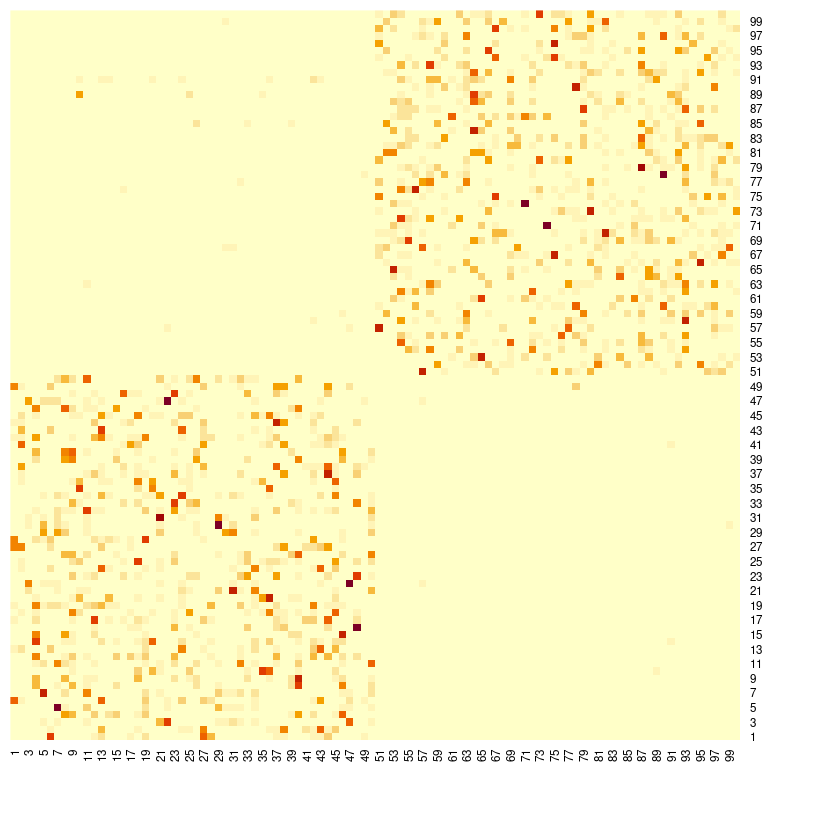

In [120]:
diag(W1) <- 0
heatmap(W1, Rowv = NA, Colv = NA)

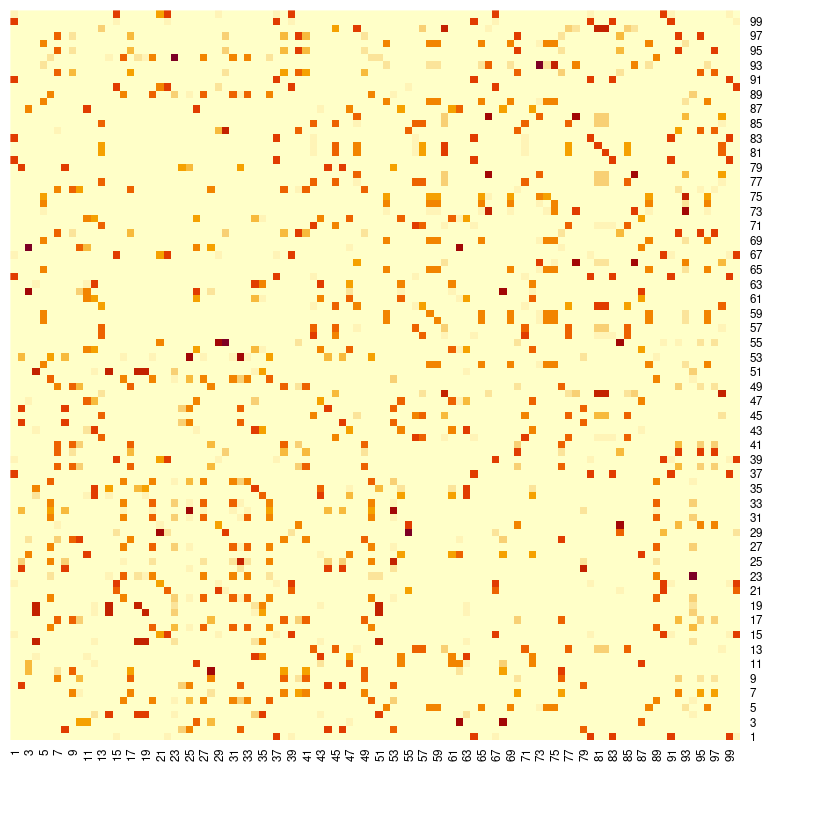

In [121]:
diag(W2) <- 0
heatmap(W2, Rowv = NA, Colv = NA)

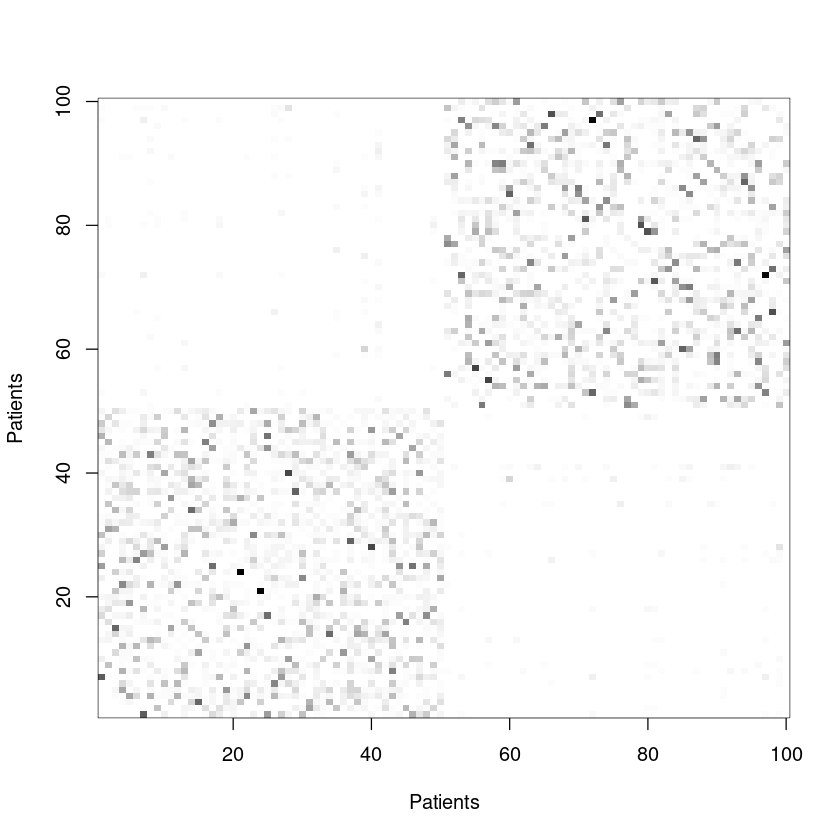

In [122]:
displayClusters(W1, dat$status)

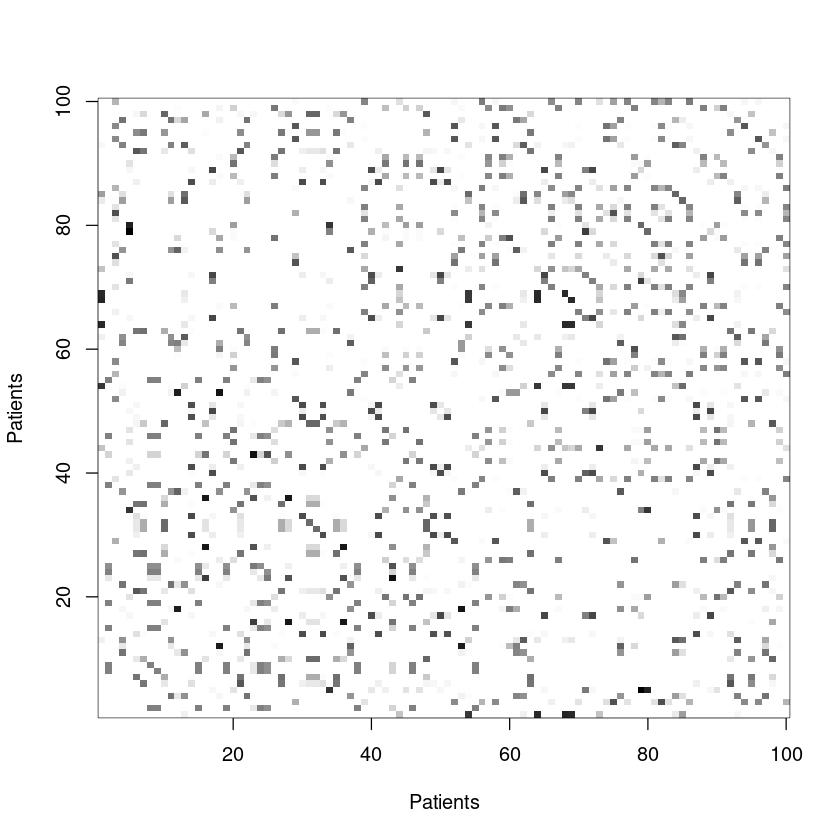

In [123]:
displayClusters(W2, dat$status)

In [124]:
#### RUN SNF
T <- 20
W <- SNF(list(W1,W2), K, T)

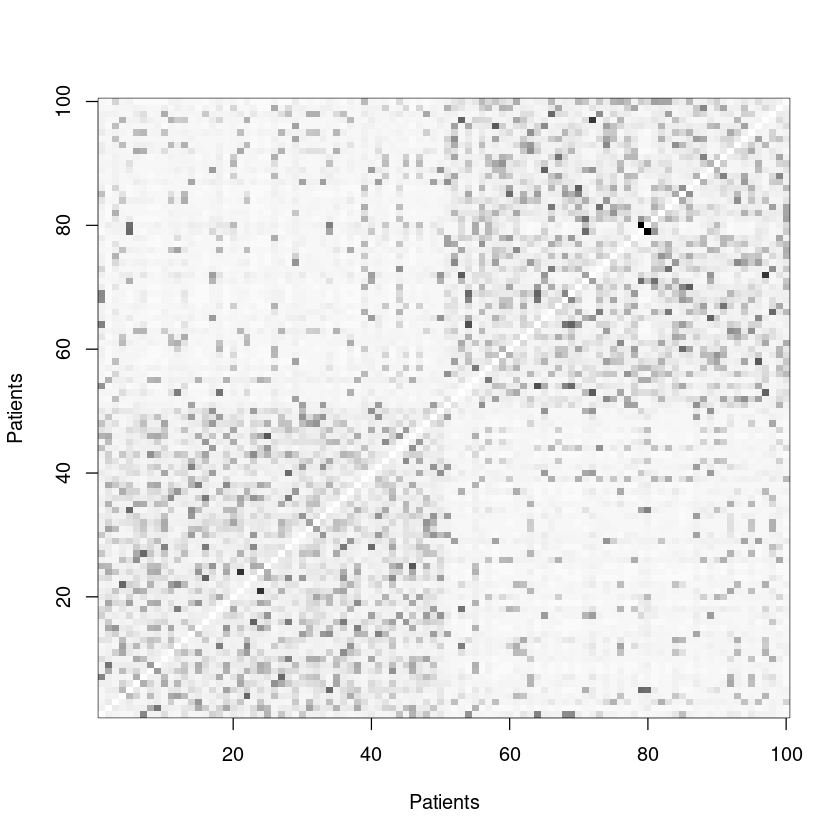

In [125]:
displayClusters(W, dat$status)

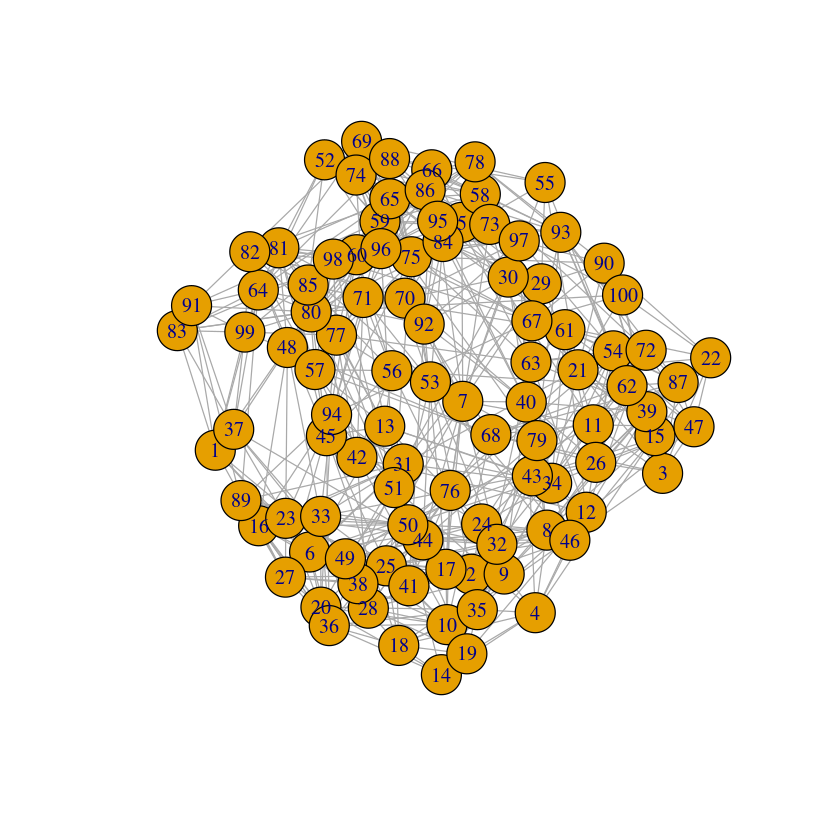

In [130]:
# Remove low weigths 
w3 <- W

w3[w3<11e-03] <- 0

# Plot networks
network3 <- graph_from_adjacency_matrix(w3, weighted = TRUE, mode = "undirected", diag = FALSE)

plot(network3)